# Lab 2: Analysis of Bank Marketing Dataset using Classification and Regresssion Techniques

MSDS 7331 - Section 403 <br>
 
 Andrew Walch | Rob Rivens | SabitrI KC

We chose to analyze the same data set that we used in mini lab for this classification and regression analysis.The data was obtained from UC Irvine Machine Learning Repository, which contains the information related to a direct marketing campaign of a Portuguese bank and marketing staragety via phone calls to get its clients to subscribe for a term deposit.For detailed explaination,origin and purpose of dataset refer to <a href="https://github.com/skc00/Data-Mining-Mini-Project">Mini-Lab: Bank Marketing Dataset .</a>

In [49]:
import pandas as pd
bank = pd.read_csv("Dataset\Bank Marketing Data.csv") # read the csv file 
bank.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [50]:
#Import Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt





## Preparation and defination of class variable
10 points

Description:
Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.
#### classification dataset:

In [51]:
#Remove unneeded variables
bank_classification = bank.drop(['day','poutcome'],axis=1)
# delete age from the dataset because we want to predict the age range of customers.
#del bank_classification['age']
bank_classify = pd.get_dummies(bank_classification, columns=['job','marital',
                                         'education','default',
                                         'housing','loan',
                                         'contact','month',
                                              ])
bank_classify.y.replace(('yes', 'no'), (1, 0,), inplace=True)



#### Classification Dataset:

In [52]:
#create a new variable called age_range and catagorize the age range into 4 different groups.
for i, row in bank_classification.iterrows():
    if row['age'] < 25:
        bank_classification.at[i, 'age_range'] = '<25'
    elif row['age'] >= 25 and row['age'] < 50 :
        bank_classification.at[i, 'age_range'] = '25-50'
    elif row['age'] >= 50 and row['age'] < 75 :
        bank_classification.at[i, 'age_range'] = '50-75'
    else:
        bank_classification.at[i, 'age_range'] = '>75'  
bank_classification.head()
    

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,y,age_range
0,58,management,married,tertiary,no,2143,yes,no,unknown,may,261,1,-1,0,no,50-75
1,44,technician,single,secondary,no,29,yes,no,unknown,may,151,1,-1,0,no,25-50
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,may,76,1,-1,0,no,25-50
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,may,92,1,-1,0,no,25-50
4,33,unknown,single,unknown,no,1,no,no,unknown,may,198,1,-1,0,no,25-50


In [64]:
# Classification table display
def displayTable():
    variables_desc = pd.read_csv(r'Dataset\variable_desc.csv',delimiter='\t')
    variable_desc=   variables_desc.drop(['day' , 'poutcome'],axis=1)
    df = variables_desc.sort_index()     
    tableStyle ="""<style> #vtTable { font-family: "Trebuchet MS", Arial, Helvetica, sans-serif; border-collapse: collapse;}
        #vtTable td, #vtTable th {border: 1px solid #ddd;padding: 8px;text-align:left;}
        #vtTable tr:nth-child(even){background-color: #f2f2f2;}
        #vtTable tr:hover {background-color: #ddd;}
        #vtTable th {padding-top: 12px;padding-bottom: 12px;text-align:left;}</style>
        """
    tableHeader = '<table id = "vtTable"><tr><th>Variable</th><th>Variable Category</th><th>Description</th><th>Variable Type</th></tr>'
    tableFooter = '</table>'
    for row in df.itertuples(index=True, name ='Pandas'): 
        #if row[1] not in ['day' , 'poutcome']:
            tableRow = '<tr><td>'+row[1]+'</td><td>'+row[2]+'</td><td>'+row[3]+'</td><td>'+row[4]+'</td></tr>'
            tableHeader += tableRow
    variable_table = tableStyle + tableHeader + tableFooter
    return display(HTML(variable_table))
displayTable()

ValueError: labels ['day' 'poutcome'] not contained in axis

In [53]:
bank_classification.tail()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,y,age_range
45206,51,technician,married,tertiary,no,825,no,no,cellular,nov,977,3,-1,0,yes,50-75
45207,71,retired,divorced,primary,no,1729,no,no,cellular,nov,456,2,-1,0,yes,50-75
45208,72,retired,married,secondary,no,5715,no,no,cellular,nov,1127,5,184,3,yes,50-75
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,nov,508,4,-1,0,no,50-75
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,nov,361,2,188,11,no,25-50


In [54]:
 bank_classification.describe()

,age,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


#### Regression dataset

For the regression dataset we will consider the original dataset without the classification of age range and delete unnecessary attibutes.We are only using continuous data types not the categorical for regression purposes.The dataset has 45,211 observations and 17 columns.All the variables and details are shown on table.

bank shape: (45211, 14)


TypeError: Empty 'DataFrame': no numeric data to plot

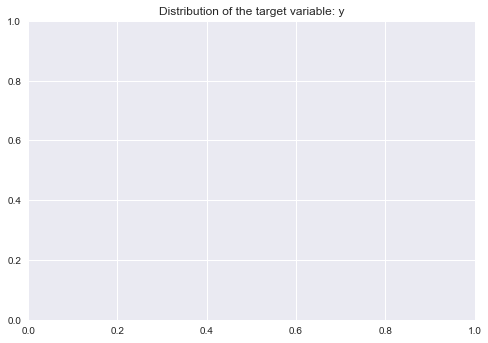

In [47]:
variables_desc = pd.read_csv(r'Dataset\variable_desc.csv',delimiter='\t')
bank = pd.read_csv("Dataset\Bank Marketing Data.csv") # read the csv file
# remove unneeded variables
del bank['poutcome']
del bank['day']

seed = 0
# shuffle the dataset (just in case)
X = bank.sample(frac=1, random_state=seed)
y = X['y'].copy()
del X['y']

bank_reg = {
    'X': X,
    'y': y
}
print('bank shape:', X.shape)

plt.title('Distribution of the target variable: y')
y.plot(kind='box')
output_variables



Describe the Final Dataset<br>
5 points
#### Description:
#### Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

#### Final Dataset for Classification and Regression

-Our bank marketing dataset was preety clean,we didnt have any missing values.However for our classification purpose, our dataset is to predict the age range of customers who subcribed the term deposit.so we removed the attributes we dont need such as poutcome and day.We also create a new attribute called age range which will classify the age range of our customers and we transform the categorical variable into indicator variables.
The final shape of our classification dataset was <br>
-For regression we consider the original dataset and delete the unwanted attributes but we dint create any new variables.we are only using nominal and continuous data types for regression purposes.The final shape of our regression dataset is 45,211 observations and 14 columns.The variable that we are predicting is term deposit (y).



# Modeling and Evaluation

10 points

Description:
Choose and explain your evaluation metrics that you will use (i.e., accuracy, precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.

Evaluation metrics for classification:
For our classification model evaluation,we will be using the accuracy and F-measure.Accuracy is the ratio of correct predictions to the total number of observations.The closer accuracy is to 1, the more accurate the model is.Since F-measure is a weighted average of recall and precision,the better the F-measure score means the model has better recall and precision.Precision is the ratio of correctly predicted positive observations to the total positive observations and recall is the ratio of correctly predicted positive observations to all actual positives.
so basically F-measure which is essentially a weighted average of the precision and recall into one simple statistic. F-measure will be a number between 0 and 1 where closer to 1 is better and approaching 0 is worse.


Evaluation metrics for regression:
For our regression models evaluation,we will be checking mean square error(MSE)  and R^2.MSE is a measure of how close a fitted regression line is to data points.R^2 measures the proportion of variability in y explained by the regression models.so with the good amount of left skewed  asymmetric data,we are trying to minimize MSE and have a R^2 value close to 1.
    

10 points

Description:
Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.

For our classification analysis,we choose to use stratified K-Fold cross validation with 4 folds.since stratification process rearrange the data as to ensure each fold is a good representative of all strata of the data and it is also generally a better scheme, both in terms of bias and variance,when compared to regular cross validation.Also with the amount of data we have,we think splitting into 4 folds would be enough splits to reduce the weight of any outliers.
Our data is not a time series so we did not need to use continuous train and test sets over time.

For our regression analysis,we choose to use stratified K-Fold cross validation with 4 folds.since stratification process rearrange the data as to ensure each fold is a good representative of all strata of the data and it is also generally a better scheme, both in terms of bias and variance,when compared to regular cross validation.Also with the amount of data we have,we think splitting into 4 folds would be enough splits to reduce the weight of any outliers. Our data is not a time series so we did not need to use continuous train and test sets over time.

# Three Different Classification/Regression Models
20 points

Description:
Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!

## Classification Models:

## Regression Models:

# Visualizations and Analysis
10 points

Description:
Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.

10 points

Description:
Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.

10 points

Description:
Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.

5 points

Description:
How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?

10 points

Description:
You have free reign to provide additional analyses. One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?

# References: